In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
%matplotlib inline
import random

random.seed(42)

In [2]:
def signal(s):
  return 0.5 * np.sin(2*s) - np.sin(3*s)

N = 200
t = np.linspace(0, 4*np.pi, N+1)[:-1]
x = signal(t)

noise = np.random.normal(0, np.sqrt(0.01), N)
x_noise = x + noise


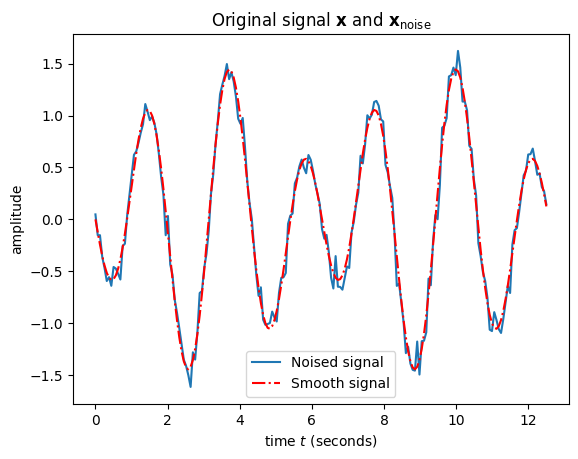

In [3]:
plt.plot(t, x_noise, label = "Noised signal")
plt.plot(t, x, "r-.", label = "Smooth signal")
plt.title('Original signal $\mathbf{x}$ and $\mathbf{x}_\mathrm{noise}$')
plt.xlabel("time $t$ (seconds)")
plt.ylabel("amplitude")
plt.legend()
plt.show()

In [5]:
rng = np.arange(N).reshape(1, -1)

T = 4 * np.pi
cos_samples = np.cos(2 * np.pi * rng * t.reshape(-1, 1) / T)
sin_samples = np.sin(2 * np.pi * rng * t.reshape(-1, 1) / T)

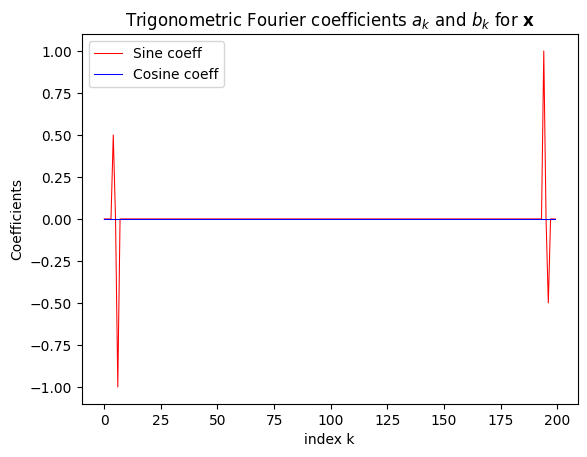

In [6]:
a = 2 / N * np.sum(signal(t) * cos_samples, axis=1)   
b = 2 / N * np.sum(signal(t) * sin_samples, axis=1)   

plt.plot(range(N), b.T, "r", lw = 0.75, label = "Sine coeff")
plt.plot(range(N), a.T, "b", lw = 0.75, label = "Cosine coeff")
plt.xlabel("index k")
plt.ylabel("Coefficients")
plt.title('Trigonometric Fourier coefficients $a_k$ and $b_k$ for $\mathbf{x}$')
plt.legend()
plt.show()


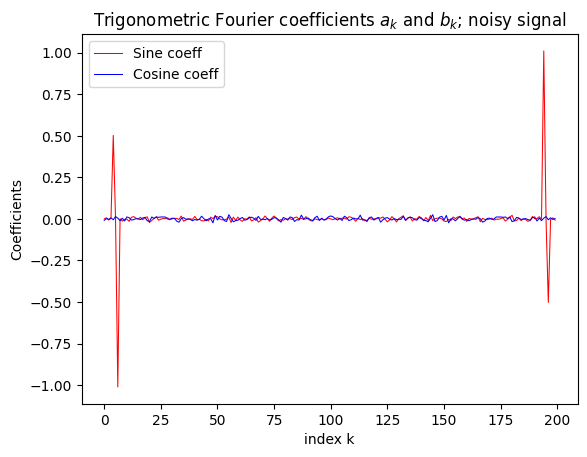

In [7]:
a_noise = 2 / N * np.sum(x_noise * cos_samples, axis=1) 
b_noise = 2 / N * np.sum(x_noise * sin_samples, axis=1)  

plt.plot(range(N), b_noise.T, "r", lw = 0.75, label = "Sine coeff")
plt.plot(range(N), a_noise.T, "b", lw = 0.75, label = "Cosine coeff")
plt.xlabel("index k")
plt.ylabel("Coefficients")
plt.title('Trigonometric Fourier coefficients $a_k$ and $b_k$; noisy signal')
plt.legend()
plt.show()


In [8]:
def x_rec(n, a, b):
    return a[0] / 2 + np.sum(a[1:n].reshape(-1, 1) * cos_samples[1:n, :], axis=0) + np.sum(b[1:n].reshape(-1, 1) * sin_samples[1:n, :], axis=0)

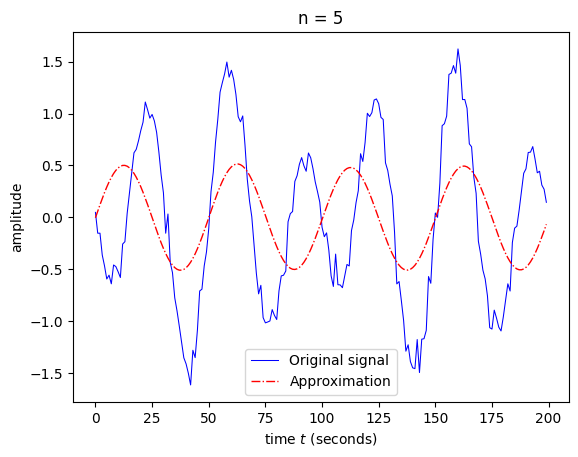

n: 5
False
1.182336919588224


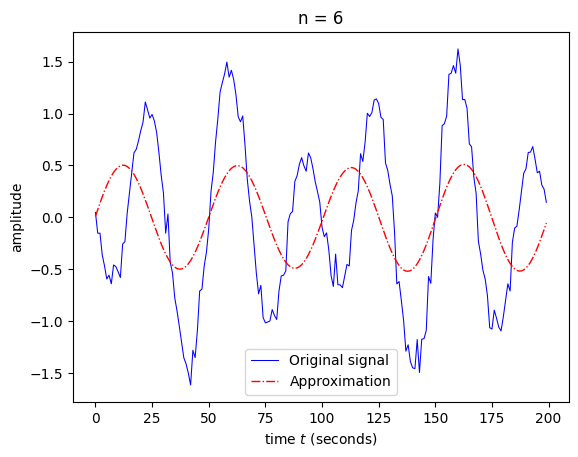

n: 6
False
1.1981653552496787


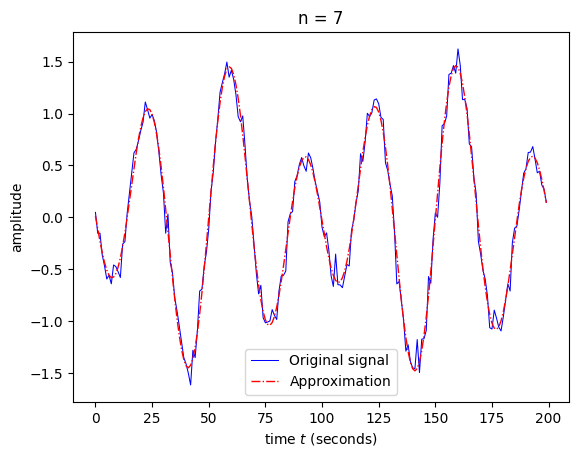

n: 7
False
0.2789363832266143


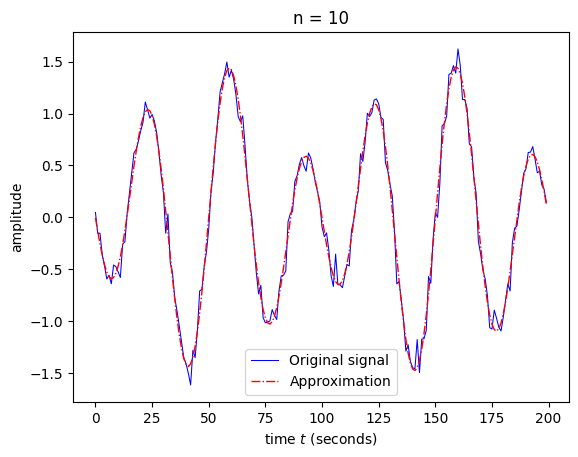

n: 10
False
0.2705864837009857


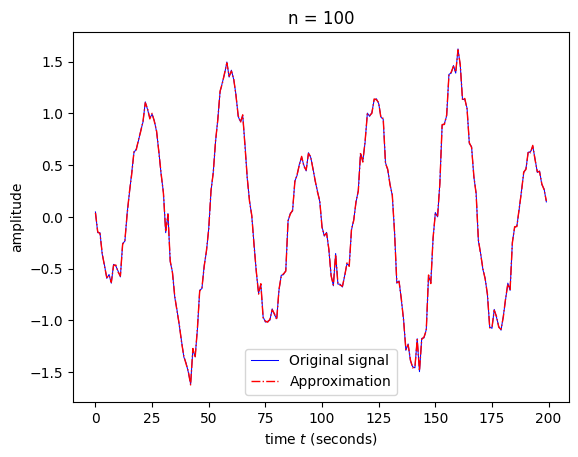

n: 100
False
0.008979706438626334


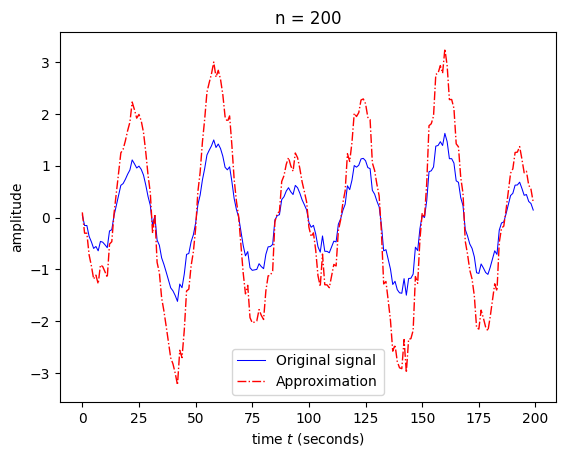

n: 200
False
1.6272247588219892


In [9]:
for n in (5, 6, 7, 10, 100, 200):
    plt.plot(range(N), x_noise, 'b', lw= 0.75, label = "Original signal")
    plt.plot(range(N), x_rec(n, a_noise, b_noise).T, 'r-.', lw = 1, label = "Approximation")
    plt.title(f"n = {n}")
    plt.xlabel("time $t$ (seconds)")
    plt.ylabel("amplitude")
    plt.legend()
    plt.show()
    print("n:", n)
    print(np.allclose(x_noise, x_rec(n, a_noise, b_noise), rtol=0.01))
    print(np.max(np.abs(x_noise - x_rec(n, a_noise, b_noise))))

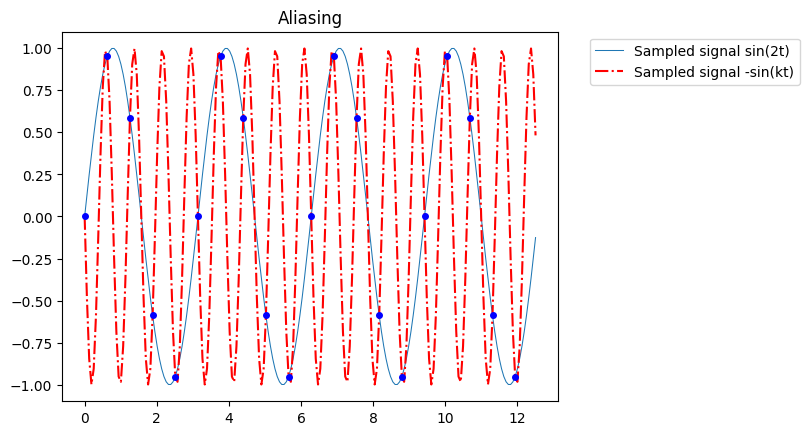

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [10]:
y = np.linspace(0,4*np.pi, 21)[:-1]

plt.plot(t, np.sin(2*t), lw = 0.75, label = "Sampled signal sin(2t)")
k = 8  

plt.plot(t, -np.sin(k*t), "r-.", label = "Sampled signal -sin(kt)")
plt.plot(y, np.sin(2*y), "bo", markersize = 4)
plt.title('Aliasing')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

print(np.isclose(np.sin(2*y), -np.sin(8*y)))

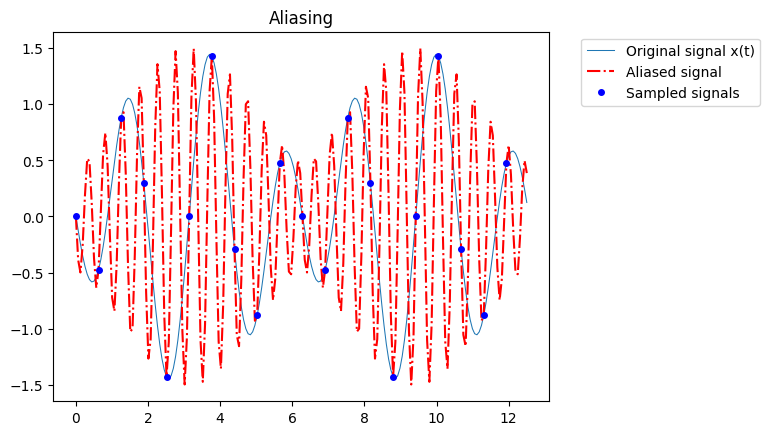

In [11]:
plt.plot(t, x, lw = 0.75, label = "Original signal x(t)")

def alias(s):
    return 0.5 * np.sin(12*s) - np.sin(13*s)
plt.plot(t, alias(t), "r-.", label = "Aliased signal")
plt.plot(y, signal(y)  , "bo", markersize = 4, label = "Sampled signals")

plt.title('Aliasing')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [12]:
np.isclose(signal(y), alias(y) )

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

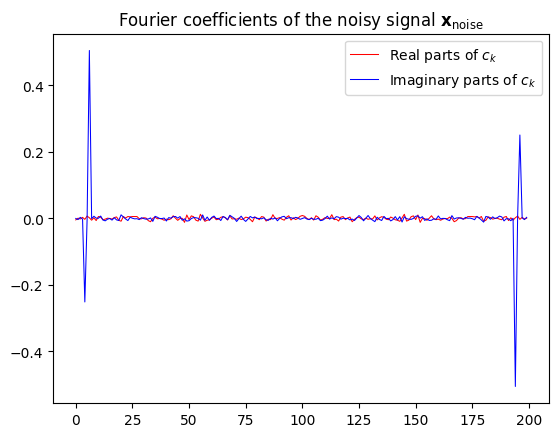

In [13]:
compl_exp = np.exp( -2j * np.pi * rng * t.reshape(-1, 1) / T)  

c = 1 / N * np.sum(x_noise * compl_exp, axis=1)
plt.plot(c.real.T, 'r', lw = 0.75, label = "Real parts of $c_k$")
plt.plot(c.imag.T, 'b', lw = 0.75, label = "Imaginary parts of $c_k$")
plt.title('Fourier coefficients of the noisy signal $\mathbf{x}_{\mathrm{noise}}$')
plt.legend()
plt.show()

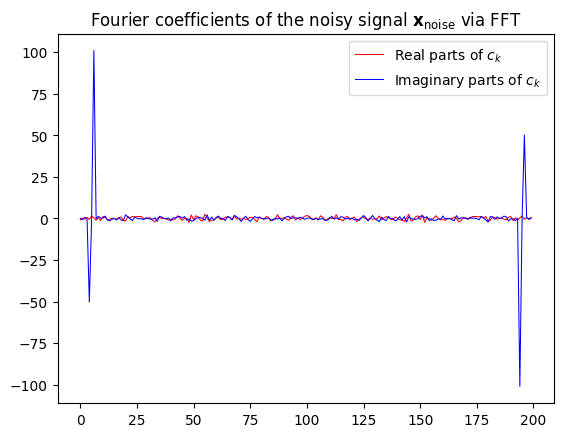

In [14]:
freq = fft(x_noise)

plt.plot(freq.real, 'r', lw = 0.75, label = "Real parts of $c_k$")
plt.plot(freq.imag, 'b', lw = 0.75, label = "Imaginary parts of $c_k$")
plt.title('Fourier coefficients of the noisy signal $\mathbf{x}_{\mathrm{noise}}$ via FFT')
plt.legend()
plt.show()

In [15]:
np.allclose(c, freq/200)

True

In [16]:
np.allclose(x_noise, ifft(freq))

True

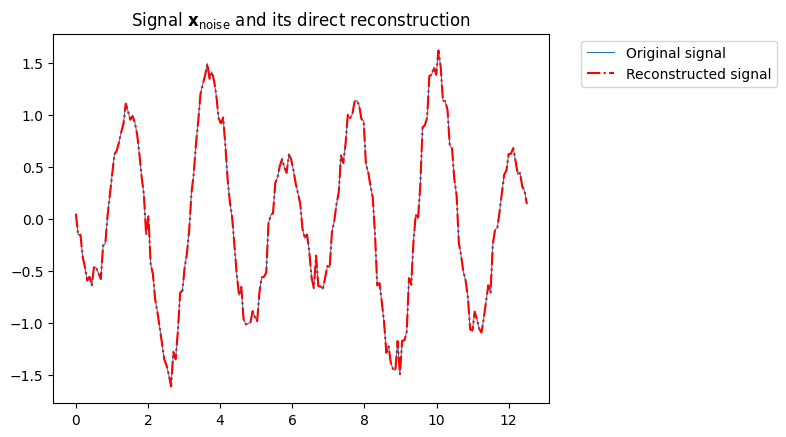

In [18]:
e = np.exp( 2j * np.pi * rng * t.reshape(-1, 1) / T)
x_rec_F = np.sum(c * e, axis=1)   

plt.plot(t, x_noise, lw = 0.75, label = "Original signal")
plt.plot(t, x_rec_F.T, "r-.", label = "Reconstructed signal")
plt.title('Signal $\mathbf{x}_{\mathrm{noise}}$ and its direct reconstruction')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [19]:
x_rec_FFT = ifft(freq)
np.allclose(x_noise, x_rec_FFT)

True

In [20]:
np.allclose(x_noise, x_rec_F)

True

In [21]:
freq_smoothed = freq.copy()
freq_smoothed[10:-10] = 0

In [22]:
np.sum(np.isclose(x_noise, ifft(freq_smoothed), rtol = 0.05))

63

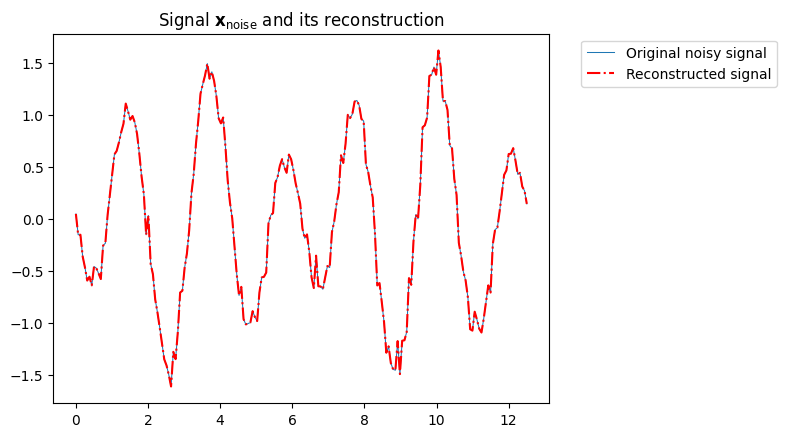

In [23]:
plt.plot(t, x_noise, lw = 0.75, label = "Original noisy signal")
plt.plot(t, ifft(freq), 'r-.', label = "Reconstructed signal")
plt.title('Signal $\mathbf{x}_{\mathrm{noise}}$ and its reconstruction')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

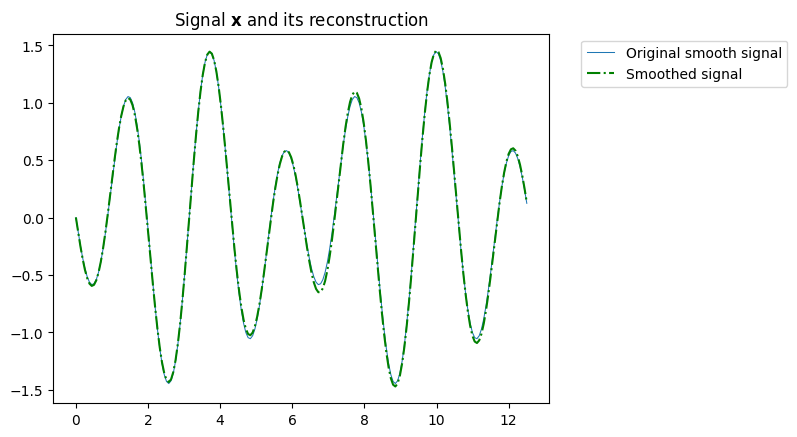

In [24]:
plt.plot(t, x, lw = 0.75, label = "Original smooth signal")
plt.plot(t, ifft(freq_smoothed), 'g-.', label = "Smoothed signal")
plt.title('Signal $\mathbf{x}$ and its reconstruction')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()